In [1]:
# Import Modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

!pip install plotly.express
import plotly.express as px
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline and Column Transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(display = "diagram")

# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

In [2]:
# Loading Dataset

%load_ext autoreload
%autoreload 2

data = pd.read_csv("../raw_data/Recipes_incl_pre_time.csv")

data.Relabelled_Ingredients = data.Relabelled_Ingredients.apply(literal_eval)
data['Instructions'] = data.Instructions.apply(str)
data = data.drop(columns=['Unnamed: 0.1'])

In [3]:
#Creating metrics

data['number_of_ingredients'] = data.apply(lambda x: len(x['Relabelled_Ingredients']), axis = 1 )
data['length_of_instructions'] = data.apply(lambda x: len(x['Instructions']), axis = 1 )


In [4]:
X = data[['number_of_ingredients','length_of_instructions']]

In [5]:
X

,number_of_ingredients,length_of_instructions
0,7,613
1,10,862
2,6,273
3,4,354
4,7,637
...,...,...
7868,15,1668
7869,13,686
7870,7,857
7871,6,1301


## Scaling

In [30]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,number_of_ingredients,length_of_instructions
0,0.12,0.041119
1,0.18,0.059018
2,0.10,0.016677
3,0.06,0.022500
4,0.12,0.042844
...,...,...
7868,0.28,0.116958
7869,0.24,0.046366
7870,0.12,0.058659
7871,0.10,0.090576


In [31]:
X_scaled ['euclidian'] = 0 

In [32]:
X_scaled['euclidian'] = X_scaled.apply(lambda x: 
                                   np.sqrt(x['number_of_ingredients']**2 + x['length_of_instructions']**2) ,axis = 1 )

<AxesSubplot:>

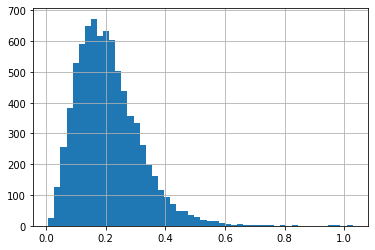

In [35]:
X_scaled.euclidian.hist(bins=50)

In [45]:
X_scaled.euclidian.quantile(0.25)

0.1327901634651436

In [46]:
def classification(x):
    if x < X_scaled.euclidian.quantile(0.25):
        return 0
    if x >= X_scaled.euclidian.quantile(0.25) and x < X_scaled.euclidian.quantile(0.5):
        return 1
    if x >= X_scaled.euclidian.quantile(0.5) and x < X_scaled.euclidian.quantile(0.75):
        return 2
    if x >= X_scaled.euclidian.quantile(0.75):
        return 3

In [47]:
X_scaled['class'] = 0

In [48]:
X_scaled['class'] = X_scaled.apply(lambda x: classification(x['euclidian']), axis=1)

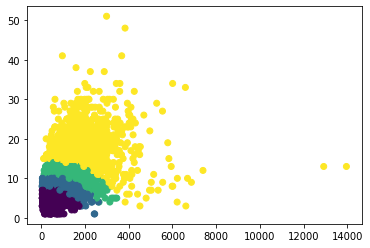

In [49]:
plt.scatter(x = X['length_of_instructions'],y= X['number_of_ingredients'] , c=X_scaled['class'], cmap='viridis')

## Final Clustering and Merge

In [51]:
X_labelled = pd.concat([X,X_scaled['class']],axis=1).rename(columns={0:"complexity"})
X_labelled

,number_of_ingredients,length_of_instructions,class
0,7,613,0
1,10,862,1
2,6,273,0
3,4,354,0
4,7,637,0
...,...,...,...
7868,15,1668,3
7869,13,686,2
7870,7,857,1
7871,6,1301,1


In [55]:
X_labelled['class'].value_counts()

1    1969
3    1969
2    1968
0    1967
Name: class, dtype: int64

In [57]:
X_labelled.groupby(by="class", dropna=False).mean()

,number_of_ingredients,length_of_instructions
class,,
0,5.277580,503.016268
1,8.557136,816.496191
2,11.600610,1095.084350
3,17.175724,1727.020823


In [58]:
X_labelled

,number_of_ingredients,length_of_instructions,class
0,7,613,0
1,10,862,1
2,6,273,0
3,4,354,0
4,7,637,0
...,...,...,...
7868,15,1668,3
7869,13,686,2
7870,7,857,1
7871,6,1301,1
